In [30]:
import urllib, json
import os 
from dotenv import load_dotenv

def load_data():
    load_dotenv()
    GMAPS_API_KEY=os.environ['GMAPS_API_KEY']
    url = "https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json"
    response = urllib.request.urlopen(url)
    data = json.loads(response.read())
    return data


[{'sno': '500101001', 'sna': 'YouBike2.0_捷運科技大樓站', 'tot': 28, 'sbi': 0, 'sarea': '大安區', 'mday': '2023-07-31 23:12:53', 'lat': 25.02605, 'lng': 121.5436, 'ar': '復興南路二段235號前', 'sareaen': 'Daan Dist.', 'snaen': 'YouBike2.0_MRT Technology Bldg. Sta.', 'aren': 'No.235， Sec. 2， Fuxing S. Rd.', 'bemp': 28, 'act': '1', 'srcUpdateTime': '2023-08-13 21:07:42', 'updateTime': '2023-08-13 21:08:25', 'infoTime': '2023-07-31 23:12:53', 'infoDate': '2023-07-31'}, {'sno': '500101002', 'sna': 'YouBike2.0_復興南路二段273號前', 'tot': 21, 'sbi': 0, 'sarea': '大安區', 'mday': '2023-07-29 20:05:09', 'lat': 25.02565, 'lng': 121.54357, 'ar': '復興南路二段273號西側', 'sareaen': 'Daan Dist.', 'snaen': 'YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.', 'aren': 'No.273， Sec. 2， Fuxing S. Rd. (West)', 'bemp': 21, 'act': '1', 'srcUpdateTime': '2023-08-13 21:07:42', 'updateTime': '2023-08-13 21:08:25', 'infoTime': '2023-07-29 20:05:09', 'infoDate': '2023-07-29'}, {'sno': '500101003', 'sna': 'YouBike2.0_國北教大實小東側門', 'tot': 16, 'sbi': 11, 'sarea

In [31]:
# there is currently 1299 Ubikes in use in Taipei city?
len(data)

1299

In [32]:
data[0]

{'sno': '500101001',
 'sna': 'YouBike2.0_捷運科技大樓站',
 'tot': 28,
 'sbi': 0,
 'sarea': '大安區',
 'mday': '2023-07-31 23:12:53',
 'lat': 25.02605,
 'lng': 121.5436,
 'ar': '復興南路二段235號前',
 'sareaen': 'Daan Dist.',
 'snaen': 'YouBike2.0_MRT Technology Bldg. Sta.',
 'aren': 'No.235， Sec. 2， Fuxing S. Rd.',
 'bemp': 28,
 'act': '1',
 'srcUpdateTime': '2023-08-13 21:07:42',
 'updateTime': '2023-08-13 21:08:25',
 'infoTime': '2023-07-31 23:12:53',
 'infoDate': '2023-07-31'}

In [33]:
# What data do we have here
data[0].keys()

dict_keys(['sno', 'sna', 'tot', 'sbi', 'sarea', 'mday', 'lat', 'lng', 'ar', 'sareaen', 'snaen', 'aren', 'bemp', 'act', 'srcUpdateTime', 'updateTime', 'infoTime', 'infoDate'])

In [34]:
# sno: serial number of the YB
# sna: name of the station 
# tot: total parking spaces at the station
# sbi: the current number of bikes at the station
# sarea: station area
# mday: date updatime time
# lat: latitude
# lng: longitude
# ar: adress
# sareaen: area english name
# snaen: name of the station english
# aren: adress in english
# bemp: empty spots at the station
# act: Site-wide disabled status (broken bikes?)
# srcUpdateTime:  when the src was updated,
# updateTime: '2023-08-13 20:13:52', when the request happened?
# infoTime: '2023-07-31 23:12:53', not sure?
# infoDate: '2023-07-31', not sure?

In [35]:
import pandas as pd

df = pd.DataFrame.from_records(data)

In [36]:
df.head()

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,srcUpdateTime,updateTime,infoTime,infoDate
0,500101001,YouBike2.0_捷運科技大樓站,28,0,大安區,2023-07-31 23:12:53,25.02605,121.54360,復興南路二段235號前,Daan Dist.,YouBike2.0_MRT Technology Bldg. Sta.,No.235， Sec. 2， Fuxing S. Rd.,28,1,2023-08-13 21:07:42,2023-08-13 21:08:25,2023-07-31 23:12:53,2023-07-31
1,500101002,YouBike2.0_復興南路二段273號前,21,0,大安區,2023-07-29 20:05:09,25.02565,121.54357,復興南路二段273號西側,Daan Dist.,YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.,No.273， Sec. 2， Fuxing S. Rd. (West),21,1,2023-08-13 21:07:42,2023-08-13 21:08:25,2023-07-29 20:05:09,2023-07-29
2,500101003,YouBike2.0_國北教大實小東側門,16,11,大安區,2023-07-30 01:09:09,25.02429,121.54124,和平東路二段96巷7號,Daan Dist.,YouBike2.0_NTUE Experiment Elementary School (...,No. 7， Ln. 96， Sec. 2， Heping E. Rd,3,1,2023-08-13 21:07:42,2023-08-13 21:08:25,2023-07-30 01:09:09,2023-07-30
3,500101004,YouBike2.0_和平公園東側,11,1,大安區,2023-07-29 12:29:09,25.02351,121.54282,和平東路二段118巷33號,Daan Dist.,YouBike2.0_Heping Park (East),No. 33， Ln. 118， Sec. 2， Heping E. Rd,10,1,2023-08-13 21:07:42,2023-08-13 21:08:25,2023-07-29 12:29:09,2023-07-29
4,500101005,YouBike2.0_辛亥復興路口西北側,16,3,大安區,2023-07-31 20:28:03,25.02153,121.54299,復興南路二段368號,Daan Dist.,YouBike2.0_Xinhai Fuxing Rd. Intersection (Nor...,No. 368， Sec. 2， Fuxing S. Rd.,13,1,2023-08-13 21:07:42,2023-08-13 21:08:25,2023-07-31 20:28:03,2023-07-31


In [37]:
# figure out which stations are currently empty

import geopandas as gpd

# maybe tryout geopandas

<Axes: xlabel='lat', ylabel='lng'>

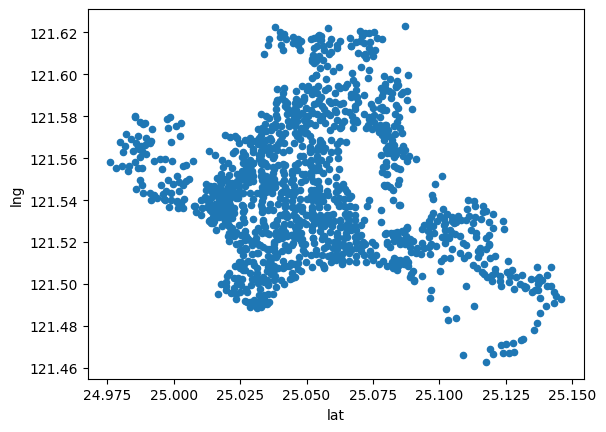

In [38]:
# draw ubike stations in a plot
import matplotlib

df.plot.scatter(x='lat', y='lng')

In [98]:
from bokeh.io import show
from bokeh.plotting import gmap, output_file, save
from bokeh.models import GMapOptions, ColumnDataSource, HoverTool, ColorBar
from bokeh.transform import linear_cmap
from bokeh.palettes import Plasma256 as palette

bokeh_width, bokeh_height = 1000, 800
df["radius"]=df["sbi"]*3.
df["usage"]=df["bemp"]/df["tot"]
output_file(filename="../sites/MapYouBike.html", title="Static HTML file")

def plot(lat, lng, zoom=13, map_type='roadmap'):
    gmap_options = GMapOptions(lat=lat, lng=lng, 
                               map_type=map_type, zoom=zoom,
                               scale_control=True)
    # the tools are defined below: 
    hover = HoverTool(
        tooltips = [
            # @price refers to the price column
            # in the ColumnDataSource. 
            ('parking spaces', '@tot'),
            ('available bikes', '@sbi'), 
        ]
    )
    p = gmap(GMAPS_API_KEY, gmap_options, title='Taipei YouBike2.0 Stations', 
             width=bokeh_width, height=bokeh_height, 
            tools=[hover, 'reset', 'wheel_zoom', 'pan'])
    source = ColumnDataSource(df)
    mapper = linear_cmap('usage', palette, 0., 1.)   
    color_bar = ColorBar(color_mapper=mapper['transform'], 
                         location=(0,0))
    p.add_layout(color_bar, 'right') 
    center = p.circle('lng', 'lat', radius="radius", alpha=0.6, 
                      color=mapper, source=source)
    show(p)
    save(p)
    return p


In [99]:
p = plot(df["lat"].mean(), df["lng"].mean(), map_type='satellite')


In [91]:
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

plot = figure()
plot.circle([1,2], [3,4])

html = file_html(p, CDN, "my plot")

In [92]:
html

'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <title>my plot</title>\n    <style>\n      html, body {\n        box-sizing: border-box;\n        display: flow-root;\n        height: 100%;\n        margin: 0;\n        padding: 0;\n      }\n    </style>\n    <script type="text/javascript" src="https://cdn.bokeh.org/bokeh/release/bokeh-3.2.1.min.js"></script>\n    <script type="text/javascript">\n        Bokeh.set_log_level("info");\n    </script>\n  </head>\n  <body>\n    <div id="ab21ef38-0410-4e78-9d72-1be02552bbb8" data-root-id="p1966" style="display: contents;"></div>\n  \n    <script type="application/json" id="p2100">\n      {"bdbb3b62-9847-4251-8327-8c4b7b26eba3":{"version":"3.2.1","title":"Bokeh Application","roots":[{"type":"object","name":"GMap","id":"p1966","attributes":{"width":1000,"height":800,"x_range":{"type":"object","name":"Range1d","id":"p1967"},"y_range":{"type":"object","name":"Range1d","id":"p1968"},"x_scale":{"type":"object","name":"L